In [80]:
#TensorFlow
import tensorflow as tf
from keras import Input
from keras.src.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.python.layers.core import Dense, Dropout

print(tf.__version__)

df=pd.read_csv('finalPCA.csv')

X=df.drop(['y'],axis=1)
y=df['y']


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

2.18.0
x_train.shape: (36168, 18)
y_train.shape: (36168,)
x_test.shape: (9043, 18)
y_test.shape: (9043,)


In [81]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(18,)),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
])


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
r = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=10, )

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7075 - loss: 406.2451 - val_accuracy: 0.8794 - val_loss: 4.3411
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7774 - loss: 6.1129 - val_accuracy: 0.8794 - val_loss: 2.7161
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7864 - loss: 2.7104 - val_accuracy: 0.8794 - val_loss: 3.7901
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7994 - loss: 1.5919 - val_accuracy: 0.8794 - val_loss: 4.0226
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8257 - loss: 0.9553 - val_accuracy: 0.7757 - val_loss: 0.4656
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8585 - loss: 0.4716 - val_accuracy: 0.8794 - val_loss: 0.4478
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8822 - loss: 0.3574 - val_accuracy: 0.8794 - val_loss: 0.3311
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8818 - loss: 0.3361 

In [84]:
model.evaluate(x_test, y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3403


[0.33507412672042847, 0.8793541789054871]

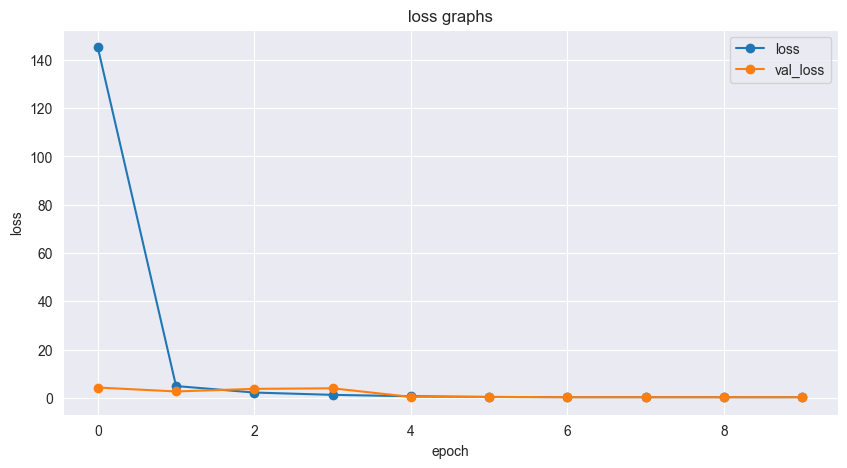

In [87]:
#plot loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(r.history['loss'], label='loss', marker='o')
plt.plot(r.history['val_loss'], label='val_loss',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("loss graphs")
plt.legend()
plt.grid(True)
plt.show()

In [71]:
from scikeras.wrappers import KerasClassifier

# Define your model creation function
def create_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the model
model = KerasClassifier(model=create_model, verbose=0)


In [72]:
# Example usage
model = build_model(n_hidden=3, n_neurons=32, learning_rate=0.01)

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
from scikeras.wrappers import KerasClassifier

keras_classifier = KerasClassifier(build_model)

In [75]:
keras_classifier.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 365.6148 - mae: 5.9164 - val_loss: 35.7994 - val_mae: 5.2093
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 94.3193 - mae: 4.4882 - val_loss: 43.1622 - val_mae: 5.6384
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 157.5368 - mae: 4.6082 - val_loss: 1.1359 - val_mae: 0.9130
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 73.2053 - mae: 2.8673 - val_loss: 11.0843 - val_mae: 2.8643
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 101.5714 - mae: 3.9603 - val_loss: 0.2381 - val_mae: 0.3440
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.2156 - mae: 1.7929 - val_loss: 0.4472 - val_mae: 0.5590
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 43.4316 - mae: 2.5520 - val_loss: 5.9774 - val_mae: 2.1013
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 136.2807 - mae: 6.4641 - val_loss: 0.2816 - val_mae: 0.3805
Epoch 9/10
1131/1131 ━━━━━━━━━━━━━━━

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The KerasClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

KerasClassifier(
	model=<function build_model at 0x0000027167B90F40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [76]:
keras_classifier.score(x_test, y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


0.8529249142983523

In [78]:
from sklearn.model_selection import GridSearchCV
parameter_gride={
    'model__n_hidden': [3,4],
    'model__n_neurons': [64,128],
    'model__learning_rate': [0.01,0.1],
    'model__kernel_initializer': ['he_normal','glorot_normal'],
    'model__add_dropout': [False,True],
    'model__add_batch_normalization': [False,True]
}

keras_classifier=KerasClassifier(build_model,learning_rate=0.01,epochs=10)

grid_search = GridSearchCV(keras_classifier,parameter_gride,cv=3,verbose=2)




In [79]:
grid_search.fit(x_train, y_train)

C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The KerasClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'